# 👋 Introduction to EDA - Hello ~World!~ [Titanic!](https://www.kaggle.com/c/titanic/overview)🚢

### Hey there! This is an introductory notebook to help you understand some of the basic steps involved in a typical EDA workflow. ###

**❓Wait, but what is EDA?**

EDA stands for 'Exploratory data analysis'. It is one of the most important techniques in any data analysis workflow. EDA helps you to understand your data inside-out, across all the variables of the dataset. It gives you important information about your data, and will be extremely important during other key steps including data preparation and the modelling stage for machine learning.


As per [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)...
>In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

## Let's see what we'll cover in this notebook ##

1. Loading the required libraries and dataset
2. Viewing sample records
3. Basic structure of the dataset
4. Missing values
5. Checking for class imbalance
6. Exploring individual features

# 1.1 Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2 Loading the Titanic dataset
In this step, we'll use **load_dataset()** function of the Seaborn library to load our Titanic dataset.

**Tip**: To get a list of all datasets available through Seaborn, you can use the **get_dataset_names()** method:

```
sns.get_dataset_names()
```

In [2]:
#Storing our Titanic dataset into a Pandas dataframe named 'df'
df = sns.load_dataset('titanic')

# 2. Viewing a small set of records using different methods

In [3]:
#Top n records of the dataframe
df.head(n=5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#Bottom n records of the dataframe
df.tail(n=5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
#Random n records of the dataframe
df.sample(n=10) #You can use the random_state parameter here for reproducibility

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
754,1,2,female,48.0,1,2,65.0000,S,Second,woman,False,NaN,Southampton,yes,False
625,0,1,male,61.0,0,0,32.3208,S,First,man,True,D,Southampton,no,True
481,0,2,male,NaN,0,0,0.0000,S,Second,man,True,NaN,Southampton,no,True
535,1,2,female,7.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
671,0,1,male,31.0,1,0,52.0000,S,First,man,True,B,Southampton,no,False
303,1,2,female,NaN,0,0,12.3500,Q,Second,woman,False,E,Queenstown,yes,True
322,1,2,female,30.0,0,0,12.3500,Q,Second,woman,False,NaN,Queenstown,yes,True
581,1,1,female,39.0,1,1,110.8833,C,First,woman,False,C,Cherbourg,yes,False
82,1,3,female,NaN,0,0,7.7875,Q,Third,woman,False,NaN,Queenstown,yes,True
80,0,3,male,22.0,0,0,9.0000,S,Third,man,True,NaN,Southampton,no,True


# 3. Basic structure of the dataset


1. The **shape** attribute of the dataframe returns a tuple object where first element is the number of rows and second element is the number of columns
2. The **info() method** gives details about individual columns in the dataframe, which includes column name, number of  non-null values and the column datatype
3. The **describe() method** proves the statistical metrics for each of the numeric columns in the dataframe

In [6]:
print(df.shape)
print(type(df.shape))
print('Number of rows is :',df.shape[0])
print('Number of columns is :',df.shape[1])

(891, 15)
<class 'tuple'>
Number of rows is : 891
Number of columns is : 15


In [7]:
#Helpful for cross-checking column datatypes and whether the column contains any null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### From the above, we can observe that the following columns have null values in them
1. age
2. embarked
3. deck
4. embark_town

In [8]:
#Min and max can be observed to get an idea about potential outliers
#50% here means the 50th percentile - Also known as the median
#Std here means the standard deviation
#Describe() method provides the five-number summary, which is a very important set of statistical metrics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 4. A brief about missing data(null values - in technical terms)

In real-world datasets, it is common to come across a few(***more commonly, a lot of***) missing values within them.

This could be caused by reasons such as :
1. Corruption of data - e.g During data transfer from one source to another
2. Failure to record data - Could be a network failure, or an issue in the data capturing device, e.g a sensor
3. Failure of validation checks while capturing data - e.g Allowing empty fields while submitting an online form

**❓But why should I be bothered about these missing values in my dataset?** 

Well, if you don't deal with them beforehand, then they will lead to errorneous & misleading analysis results, and will definitely create issues while building machine learning models. Missing values may also introduce bias in your machine learning model, which is something you should avoid, or atleast minimize.

**❓Okay, makes sense. So what are the different methods of dealing with them?**

1. Delete the complete record/observation wherever the null value occurs - Problematic as it leads to data loss
2. Delete the complete column/feature which contains atleast one null value - Again, not really effective. Unless there is an extremely high proportion of missing values in the column - Maybe more than 90%?
> ***[Imputation](https://en.wikipedia.org/wiki/Imputation_(statistics))*** is the process of replacing missing data with substituted values
3. Impute by either mean or median - The statistical approach
4. Utilize a machine learning algorithm to find the optimal value for imputation

...and many more

To dive more into the topic, you can read through the following references:
1. [Don’t let missing values ruin your analysis output, Deal with them!](https://towardsdatascience.com/dont-let-missing-values-ruin-your-analysis-output-deal-with-them-5d9c7686366c) - By Leopold d'Avezac
2. [7 Ways to Handle Missing Values in Machine Learning](https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e) - By Satyam Kumar

In [9]:
# A quick way to see whether a data point in our dataframe is null or not, is by using the isnull() method
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### In our case, the isnull() method isn't very helpful when used only by itself, since it only provides a boolean value of either True or False for each datapoint corresponding to its nullity

In [10]:
#Instead, let's use isnull().sum()
#This provides a count of null values against each column in our dataframe
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

### Let's try to visualize the occurence of missing values using a plot

<AxesSubplot:>

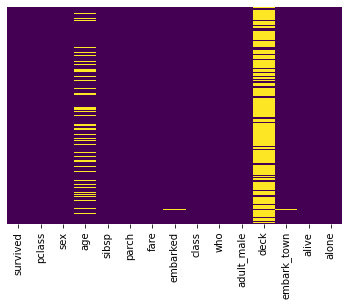

In [11]:
sns.heatmap(df.isnull(), #Input data
           yticklabels = False, #Ensures that labels on y-axis are removed
           cbar = False, #Turns off color-bar. Color-bar is used to show the gradient specification for a heatmap
           cmap = 'viridis') #Color scheme for the heatmap

## Tip: Using the missingno Python library for easy and quick interpretation of nullity in the dataset

**Credits**: https://github.com/ResidentMario/missingno

In [12]:
#You can install the library by running the below command
!pip install missingno

In [13]:
import missingno as msno

<AxesSubplot:>

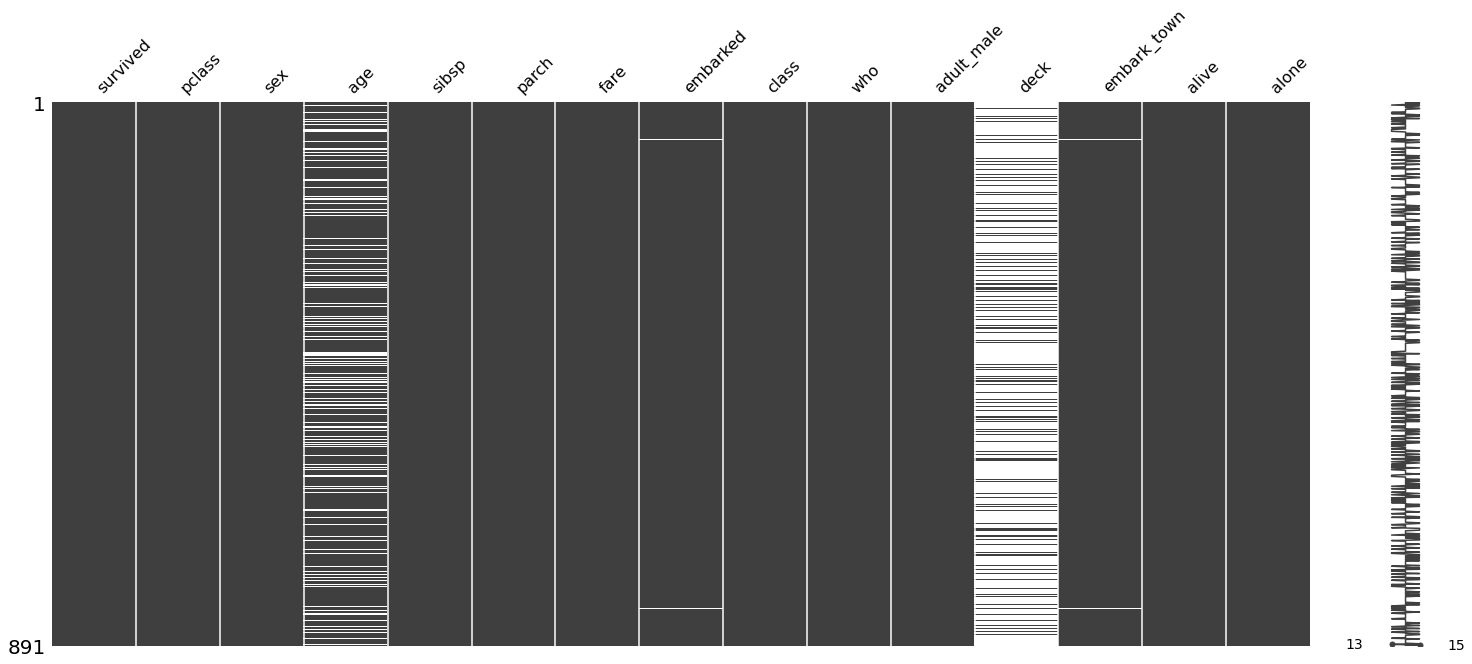

In [14]:
#Nullity Matrix
msno.matrix(df)

1. The white lines within the columns indicate missing value
2. The line at the extreme right(also called the **sparkline**) is an indicator of the number of columns having missing value(s)
3. The sparkline at the extreme right summarizes also points out the rows with the maximum and minimum nullity in the dataset.

<AxesSubplot:>

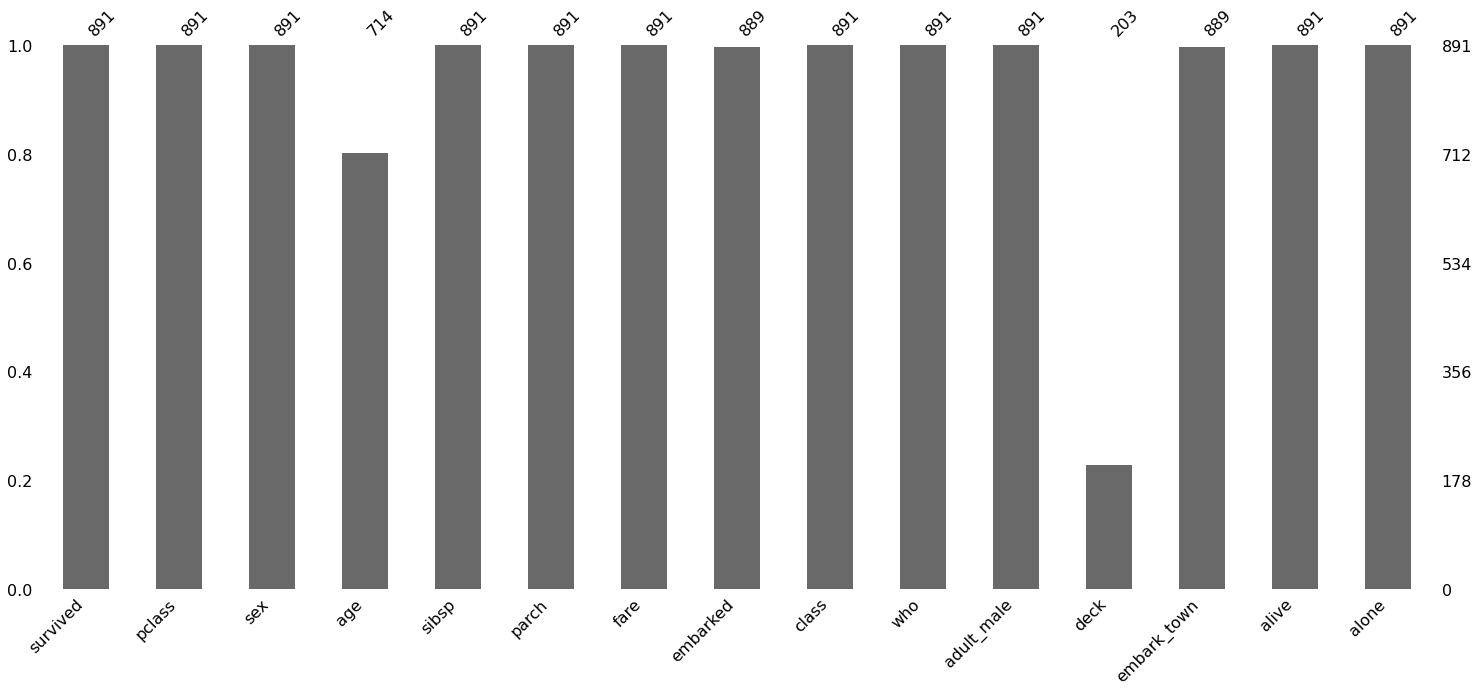

In [15]:
#Bar
msno.bar(df)

# 5. Check for class imbalance in the target column

As per the problem statement, the objective is to build a predictive model that tells us whether a passenger survived or not. This is captured in the 'survived' feature, and we need to have a look at how the classes in our target column are distributed. 

**❓But why should we check this?** 

It is essential to know the class distribution within the target, so that we know upfront whether there is a class imbalance or not. A class imbalance means that one kind of class occurs more frequently than the other one(s). Standard classification algorithms might provide inaccurate predictions if the class imbalance is not treated. It completely depends on the problem statement whether a class imbalance needs to be treated or not, or what kind of metrics we want to use for measuring the classification model's performance. In a lot of use-cases, class imbalance would exist but for evaluating the classification performance, we would want to look at other metrics apart from accuracy, such as **precision or recall.**

For example, predicting the existence of a disease - here, the minority class becomes the actual occurence of the disease. So, accuracy would be an incorrect metric for evaluation of this kind of a classification model.

<AxesSubplot:xlabel='survived', ylabel='count'>

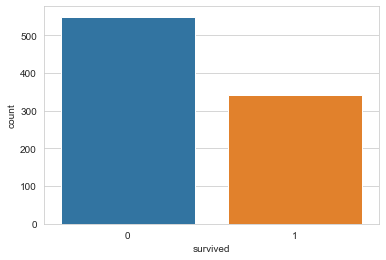

In [16]:
sns.set_style('whitegrid')
sns.countplot(x = 'survived',
              data = df)

In [17]:
#Check exact values
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

342 passengers survived, while the rest of the 549 passengers did not.

# 6. Exploring individual features

We'll be analyzing the features based on their type:
1. Categorical features - class, who, embark_town
2. Numerical features - age and fare


## 6.1.1 Categorical feature - Class

In [18]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [19]:
#Calculate the percentage of survived passengers, within each class category
df_pclass = df[['class', 'survived']].groupby('class', as_index=False).mean().sort_values(by='survived',ascending=False)
df_pclass['didnt_survive'] = abs(1 - df_pclass['survived']).apply(lambda x: str(round(x*100, 2)) + '%')
df_pclass['survived'] = df_pclass['survived'].apply(lambda x: str(round(x*100, 2)) + '%')
df_pclass

,class,survived,didnt_survive
0,First,62.96%,37.04%
1,Second,47.28%,52.72%
2,Third,24.24%,75.76%


<AxesSubplot:xlabel='survived', ylabel='count'>

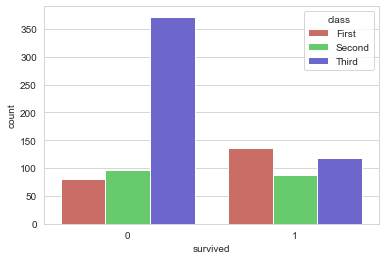

In [20]:
#Visualizing using a multi-column barplot
sns.set_style('whitegrid')
sns.countplot(x = 'survived',
              hue='class', 
              data = df,
              palette = 'hls')

1. Much more passengers from class 3 did not survive, as compared to class 1 and 2 passengers.
2. Among the survived passengers, class 1 and class 2 passengers fared a little better than class 3 passengers.

## 6.1.2 Categorical feature - ~Sex~ Who

In our dataset, we have a feature named 'who' which denotes whether the passenger is a man, woman or child. We'll use this instead of the sex column because it covers children as a group as well.

In [21]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

In [22]:
#Calculate the percentage of survived passengers, as per their group(man, woman, child)
df_who = df[['who', 'survived']].groupby('who', as_index=False).mean().sort_values(by='survived',ascending=False)
df_who['didnt_survive'] = abs(1 - df_who['survived']).apply(lambda x: str(round(x*100, 2)) + '%')
df_who['survived'] = df_who['survived'].apply(lambda x: str(round(x*100, 2)) + '%')
df_who

,who,survived,didnt_survive
2,woman,75.65%,24.35%
0,child,59.04%,40.96%
1,man,16.39%,83.61%


<AxesSubplot:xlabel='survived', ylabel='count'>

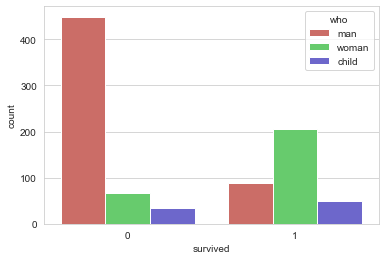

In [23]:
#Visualizing using a multi-column barplot
sns.set_style('whitegrid')
sns.countplot(x = 'survived',
              hue='who', 
              data = df,
              palette = 'hls')

Women and children were given priority during the evacuation process and the above figure and statistics support this fact.

## 6.1.3 Categorical feature - Embark Town

In [24]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [25]:
#Calculate the percentage of survived passengers, as per embark town
df_et = df[['embark_town', 'survived']].groupby('embark_town', as_index=False).mean().sort_values(by='survived',ascending=False)
df_et['didnt_survive'] = abs(1 - df_et['survived']).apply(lambda x: str(round(x*100, 2)) + '%')
df_et['survived'] = df_et['survived'].apply(lambda x: str(round(x*100, 2)) + '%')
df_et

,embark_town,survived,didnt_survive
0,Cherbourg,55.36%,44.64%
1,Queenstown,38.96%,61.04%
2,Southampton,33.7%,66.3%


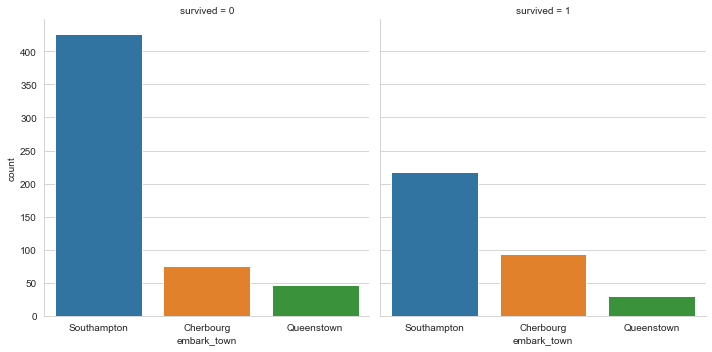

In [26]:
sns.set_style('whitegrid')
sns.catplot(x="embark_town", 
            col="survived", 
            kind="count", data=df)

### How about we check the casuality distribution as per embark town, the passenger group and class considered together?

In [27]:
df[df['survived'] == 0].groupby(['embark_town','class','who'], as_index=False).size().sort_values(by=['embark_town','size'],ascending=False).reset_index(drop=True).rename(columns={'size':'casualities'})

,embark_town,class,who,casualities
0,Southampton,Third,man,218
1,Southampton,Second,man,82
2,Southampton,First,man,51
3,Southampton,Third,woman,43
4,Southampton,Third,child,25
5,Southampton,Second,woman,6
6,Southampton,First,child,1
7,Southampton,First,woman,1
8,Southampton,Second,child,0
9,Queenstown,Third,man,32


1. From the numbers above, the most casualities are men who embarked from Southampton as compared to the rest of the two towns.
2. Also, most of the casualities from each of the embark towns belonged to third and second class passengers

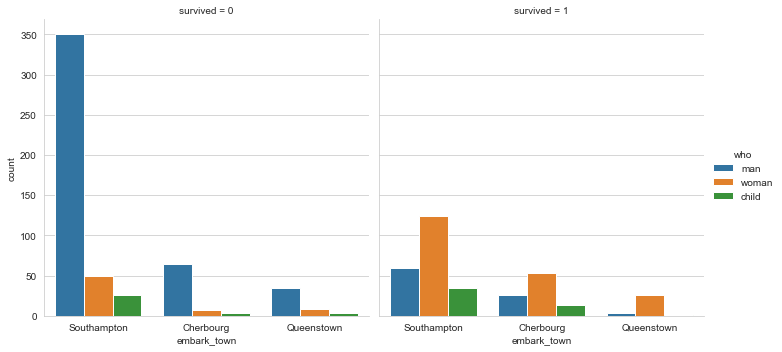

In [28]:
sns.set_style('whitegrid')
sns.catplot(x="embark_town", hue="who", 
            col="survived", 
            kind="count", data=df)

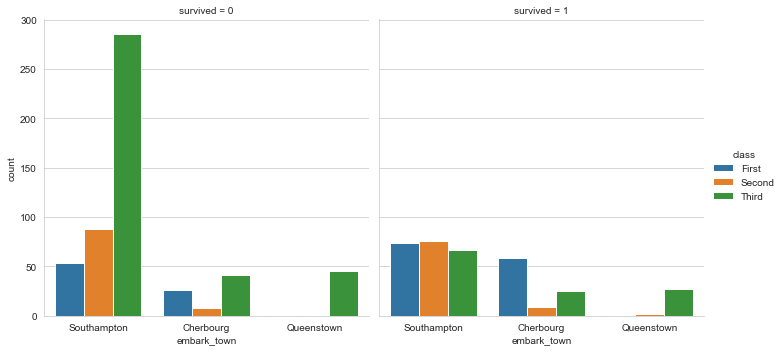

In [29]:
sns.set_style('whitegrid')
sns.catplot(x="embark_town", hue="class", 
            col="survived", 
            kind="count", data=df)

## 6.2 Numerical features - Age & Fare

### First, let's see if age and fare contain any outliers or not, using a handy plot called as a boxplot ###


**❓But wait, what is an outlier?**

An outlier is a datapoint which has an extreme/anomalous value and does not seem to fit into the majority of the dataset. In simple terms, an outlier is a standout from the crowd.

Mathematically, they can be considered as those values which satisfy either of the below conditions:
1. Value < 25th percentile - 1.5 * IQR
2. Value > 75th percentile + 1.5 * IQR

where IQR = 75th percentile - 25th percentile

**❓Why do I need to remove outliers?**

Outliers skew our data towards extremes and cause inaccurate model predictions. This is often part of the standard data cleaning process in the data analysis workflow.



## 6.2.1 Detecting outliers

### Let's understand the basic structure of a box plot first. ###

Source of the image: https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png

![Title](https://miro.medium.com/max/1838/1*2c21SkzJMf3frPXPAR_gZA.png)

### Plotting the features now... ###

<AxesSubplot:xlabel='age'>

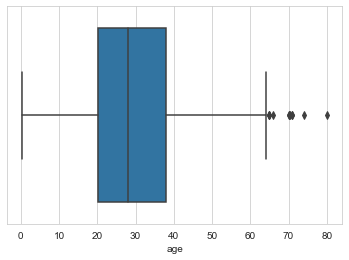

In [30]:
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='fare'>

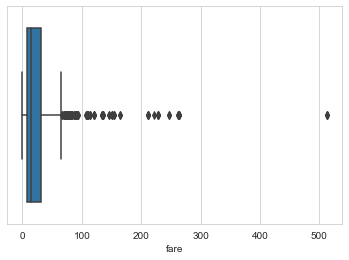

In [31]:
sns.boxplot(x=df['fare'])

**Outliers definitely exist in both age and fare features!**

## 6.2.2 Identifying outlier records and removing them ##

In [32]:
def detect_outlier_rows(list_of_cols_to_check):
    '''
    This function takes a list of strings as input - These strings are supposed to be the numeric column names 
    for which outliers need to be checked.
    
    The function iterates through each of the items in the list, and calculates the outliers as per the standard
    formula, and adds the index of the row to the outlier_indices variable
    
    Finally, the outlier_indices variable is returned by this function, denoting all the indices in our dataset
    which contains an outlier in either of the input columns
    '''
    outlier_indices = []
    for col in list_of_cols_to_check:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        #The '|' symbols acts as an OR condition
        outlier_list = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list)
    return outlier_indices

In [33]:
outliers_to_be_dropped = detect_outlier_rows(['age','fare'])

print('Number of rows before dropping the outliers: ',df.shape[0])
df = df.drop(outliers_to_be_dropped, axis = 0).reset_index(drop=True)
print('Number of rows after dropping the outliers: ',df.shape[0])

Number of rows before dropping the outliers:  891
Number of rows after dropping the outliers:  775


## 6.2.3 Viewing the correlation heatmap for age, fare and survived
This plot for numerical variables helps us see if there is any correlation with the passenger survival or not

<AxesSubplot:>

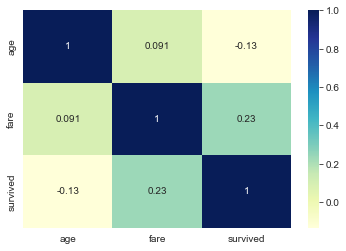

In [34]:
sns.heatmap(df[['age','fare','survived']].corr(), annot=True, cmap = 'YlGnBu')

From the above plot, we can see that fare has a bit of substantial correlation with our survived feature. This makes sense because higher the passenger class, higher the fare is, and we've already seen that first class passengers are much more likely to survive as compared to second and third class passengers.

<AxesSubplot:xlabel='class', ylabel='fare'>

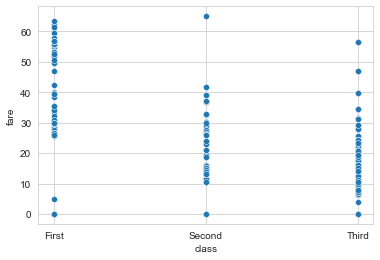

In [35]:
sns.scatterplot(x=df['class'], y=df['fare'])

# Thank you for taking out the time to go through this notebook! 

I would love to hear feedback and suggestions from you. As I've just started getting my hands dirty on these kind of mini-projects, your feedback would be invaluable for me. 

You can reach me at https://www.linkedin.com/in/abhishekdutta404/ or on Kaggle, at https://www.kaggle.com/abhishekdutta1995